# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/B_A_Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

Also the dataset does not contains any NULL values.  

##EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

int - [num_passengers, purchase_lead ,length_of_stay, flight_hour,flight_day , wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete]

float -[ flight_duration, ]

categories - sales_channel, trip_type, route, booking_origin

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


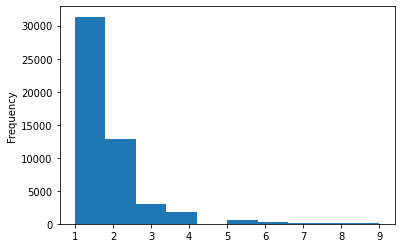

In [ ]:
df.num_passengers.plot(kind = 'hist')

In [ ]:
df.num_passengers.value_counts()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

As we can depict that most of the passengers are travelling solo. 

Also group bookings are rarely made with frequent of not more than 4 persons  

In [ ]:
channel_values = df.sales_channel.value_counts()

([<matplotlib.patches.Wedge at 0x7f0081f60f10>,
 [Text(-0.3802748260428356, -1.0321778222177085, 'Internet'),
  Text(0.4148452647740026, 1.1260121696920455, 'Mobile')],
 [Text(-0.2074226323870012, -0.5630060848460227, '88.8%'),
  Text(0.24199307111816817, 0.6568404323203598, '11.2%')])

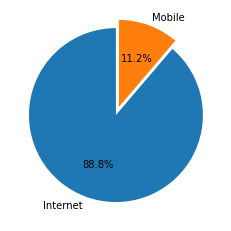

In [ ]:
plt.pie(channel_values ,startangle = 90,
        autopct = '%1.1f%%',explode = [0,0.1],  labels =channel_values.index )

In [ ]:
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

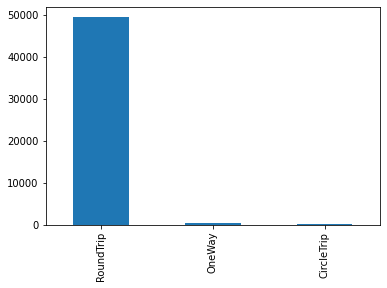

In [ ]:
df.trip_type.value_counts().plot(kind='bar')

Round Trips are booked most of the times.


In [ ]:
df.purchase_lead.mean()

84.94048

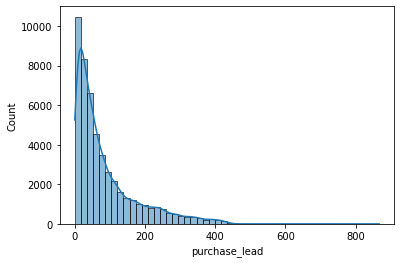

In [ ]:
sns.histplot(df, x= 'purchase_lead', bins = 50, kde =True)

On a average 85 days before the travel the flight is booked. 



In [ ]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


We could drop the bookings which has purchae lead of more than 600 cause rarely any kind of booking happens 1.5 yrs earlier.

In [ ]:
df = df[df.purchase_lead < 600]

In [ ]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete


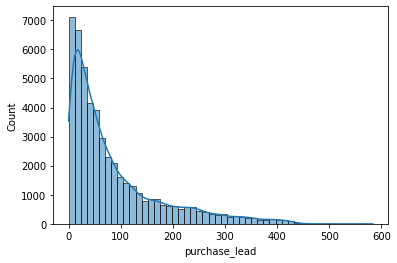

In [ ]:
sns.histplot(df, x= 'purchase_lead', bins = 50, kde =True)

In [ ]:
df.length_of_stay.describe()

count    49992.000000
mean        23.045927
std         33.889772
min          0.000000
25%          5.000000
50%         17.000000
75%         28.000000
max        778.000000
Name: length_of_stay, dtype: float64

In [ ]:
df[df.length_of_stay>200].booking_complete.value_counts()

0    235
1     44
Name: booking_complete, dtype: int64

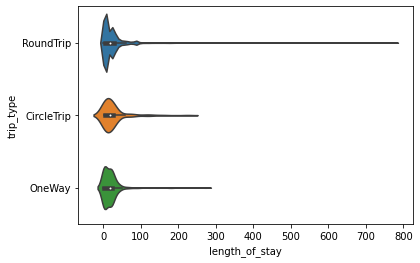

In [ ]:
sns.violinplot(y = 'trip_type', data = df, x = 'length_of_stay'   )

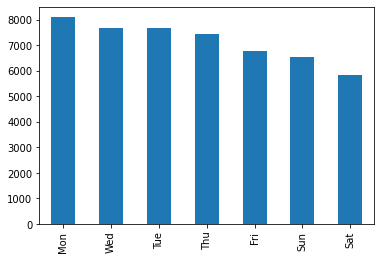

In [ ]:
df.flight_day.value_counts().plot(kind = 'bar')

On monday most of the travellers travel while the least on the Saturday. 

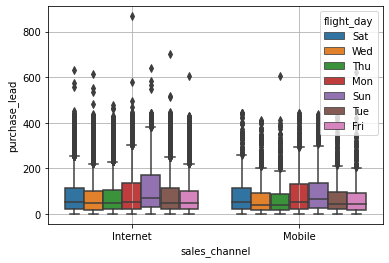

In [ ]:
sns.boxplot(x= 'sales_channel' , y = 'purchase_lead', data = df, hue = 'flight_day')
plt.grid()

In [ ]:
df.flight_day.groupby(by = df['sales_channel']).value_counts()

sales_channel  flight_day
Internet       Mon           7269
               Wed           6912
               Tue           6900
               Thu           6681
               Fri           5947
               Sun           5665
               Sat           5008
Mobile         Sun            889
               Mon            833
               Fri            814
               Sat            804
               Tue            773
               Wed            762
               Thu            743
Name: flight_day, dtype: int64

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


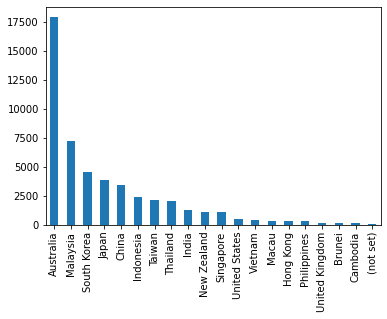

In [ ]:
df.booking_origin.value_counts()[0:20].plot(kind = 'bar')

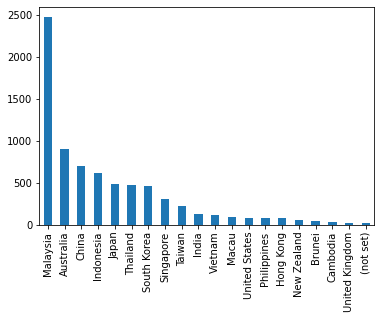

In [ ]:
df[df.booking_complete ==1]['booking_origin'].value_counts()[0:20].plot(kind = 'bar')

Percentage of applications made by each country w.r.t the booking complete?

In [ ]:
completed = df[df.booking_complete == 1].booking_origin.value_counts()
applications_booking = df.booking_origin.value_counts()

In [ ]:
completed

Malaysia       2468
Australia       900
China           694
Indonesia       615
Japan           478
Thailand        470
South Korea     462
Singapore       299
Taiwan          224
India           131
Name: booking_origin, dtype: int64

In [ ]:
applications_booking

Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: booking_origin, dtype: int64

In [ ]:
countries = completed.index
percentage_of_bookings  = {}

percentage_of_bookings = pd.Series({each: (completed[f'{each}'] / applications_booking[f'{each}'] *100) for each in countries })
percentage_of_bookings.sort_values(ascending = False, inplace = True)

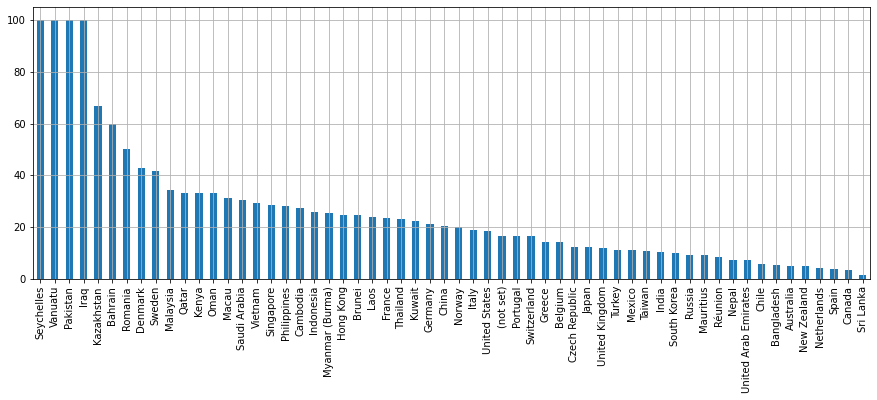

In [ ]:
plt.figure(figsize=(15,5))
percentage_of_bookings.plot(kind= 'bar')
plt.grid()


In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.booking_complete.value_counts()

0    42516
1     7476
Name: booking_complete, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb763071e80>,
 [Text(-1.1591528845441348, 0.5885274762090654, 'Booking Not Completed'),
  Text(0.9808216482249933, -0.49798483347709266, 'Booking Completed')],
 [Text(-0.7133248520271599, 0.3621707545901941, '85.045606%'),
  Text(0.5349936263045417, -0.27162809098750507, '14.954393%')])

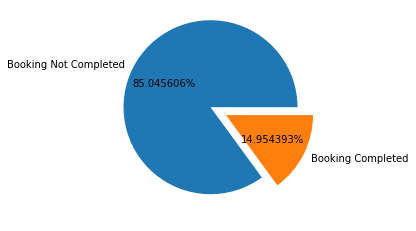

In [ ]:
plt.pie(df.booking_complete.value_counts(),autopct = '%1f%%', explode = [0.2,0], labels = ['Booking Not Completed', 'Booking Completed'])

##Data Cleaning and preping 

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000
mean,1.591215,84.848156,23.045927,9.066171,3.814370,0.668867,0.297008,0.427128,7.277481,0.149544
std,1.020190,90.157549,33.889772,5.412827,1.992803,0.470625,0.456944,0.494666,1.496858,0.356627
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,584.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49992 non-null  int64  
 1   sales_channel          49992 non-null  object 
 2   trip_type              49992 non-null  object 
 3   purchase_lead          49992 non-null  int64  
 4   length_of_stay         49992 non-null  int64  
 5   flight_hour            49992 non-null  int64  
 6   flight_day             49992 non-null  int64  
 7   route                  49992 non-null  object 
 8   booking_origin         49992 non-null  object 
 9   wants_extra_baggage    49992 non-null  int64  
 10  wants_preferred_seat   49992 non-null  int64  
 11  wants_in_flight_meals  49992 non-null  int64  
 12  flight_duration        49992 non-null  float64
 13  booking_complete       49992 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 6.7+ 

There are no NULL/ NAN values in the data

int - [num_passengers, purchase_lead ,length_of_stay, flight_hour,flight_day , wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete]

float -[  flight_duration, ]

categories - sales_channel, trip_type,  route, booking_origin             


Converting categorical features into numerical ones


In [ ]:
df.sales_channel.unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
pd.get_dummies(df.sales_channel).head(10)

,Internet,Mobile
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


In [ ]:
df['sales_channel_mobile'] = pd.get_dummies(df.sales_channel, drop_first=True)

In [ ]:
df.sales_channel_mobile.head()

0    0
1    0
2    0
3    0
4    0
Name: sales_channel_mobile, dtype: uint8

In [ ]:
df.sales_channel_mobile.value_counts()

0    44376
1     5616
Name: sales_channel_mobile, dtype: int64

Note - Mobile is 1 and INternet is 0

In [ ]:
df.drop('sales_channel', inplace = True, axis =1)

In [ ]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,2,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


In [ ]:
df.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

## filter categorical

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/B_A_Data/cutomer_filtered.csv',index_col = 0 )

In [ ]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,2,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


In [ ]:
df.trip_type.shape

(49992,)

In [ ]:
import numpy as np

In [ ]:
df['trip_type'] = ohe.fit_transform(df[['trip_type']]).toarray()

In [ ]:
df.trip_type.value_counts()

0.0    49876
1.0      116
Name: trip_type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49992 non-null  int64  
 1   trip_type              49992 non-null  float64
 2   purchase_lead          49992 non-null  int64  
 3   length_of_stay         49992 non-null  int64  
 4   flight_hour            49992 non-null  int64  
 5   flight_day             49992 non-null  int64  
 6   route                  49992 non-null  object 
 7   booking_origin         49992 non-null  object 
 8   wants_extra_baggage    49992 non-null  int64  
 9   wants_preferred_seat   49992 non-null  int64  
 10  wants_in_flight_meals  49992 non-null  int64  
 11  flight_duration        49992 non-null  float64
 12  booking_complete       49992 non-null  int64  
 13  sales_channel_mobile   49992 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 5.7+

In [ ]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,2,0.0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,0.0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,0.0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,0.0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,0.0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


In [ ]:
df.to_csv('/content/drive/MyDrive/B_A_Data/cutomer_filtered.csv')

In [33]:
df = pd.read_csv('/content/drive/MyDrive/B_A_Data/cutomer_filtered.csv', index_col=0)

In [8]:
len(df.route.unique())

799

In [9]:
len(df.booking_origin.unique())

104

we will drop the route and booking_origin columns as they are complicated to encode in the numerical values.

In [10]:
df.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,2,0.0,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,0.0,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0
2,2,0.0,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,0.0,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0
4,2,0.0,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


In [11]:
df1 = df.drop(['route', 'booking_origin'], axis =1)

In [82]:
df1.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,2,0.0,262,19,7,6,1,0,0,5.52,0,0
1,1,0.0,112,20,3,6,0,0,0,5.52,0,0
2,2,0.0,243,22,17,3,1,1,0,5.52,0,0
3,1,0.0,96,31,4,6,0,0,1,5.52,0,0
4,2,0.0,68,22,15,3,1,0,1,5.52,0,0


##Prediction Model

### Scaling Data

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

In [14]:
scale = StandardScaler()
scaled_df1 = scale.fit_transform(df1)

In [85]:
feature_scale = [feature for feature in df1.columns if feature not in ['booking_complete']]

In [86]:
mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(df1[feature_scale])

array([[0.125     , 0.        , 0.44863014, ..., 0.        , 0.17598344,
        0.        ],
       [0.        , 0.        , 0.19178082, ..., 0.        , 0.17598344,
        0.        ],
       [0.125     , 0.        , 0.41609589, ..., 0.        , 0.17598344,
        0.        ],
       ...,
       [0.        , 0.        , 0.04109589, ..., 1.        , 0.19668737,
        0.        ],
       [0.        , 0.        , 0.02568493, ..., 1.        , 0.19668737,
        0.        ],
       [0.        , 0.        , 0.03253425, ..., 0.        , 0.19668737,
        0.        ]])

In [107]:
# train = pd.concat([train[['Id', 'SalePrice']].reset_index(drop=True),
#                     pd.DataFrame(scaler.transform(train[feature_scale]), columns=feature_scale)],
#                     axis=1)

mm_scaled = pd.concat([ df1['booking_complete'].reset_index(drop = True), 
                      pd.DataFrame(mm_scaler.transform(df1[feature_scale]),
                                   columns = feature_scale
                                   )]
                      ,axis =1 )


In [108]:
mm_scaled.head()

,booking_complete,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_mobile
0,0,0.125,0.0,0.448630,0.024422,0.304348,0.833333,1.0,0.0,0.0,0.175983,0.0
1,0,0.000,0.0,0.191781,0.025707,0.130435,0.833333,0.0,0.0,0.0,0.175983,0.0
2,0,0.125,0.0,0.416096,0.028278,0.739130,0.333333,1.0,1.0,0.0,0.175983,0.0
3,0,0.000,0.0,0.164384,0.039846,0.173913,0.833333,0.0,0.0,1.0,0.175983,0.0
4,0,0.125,0.0,0.116438,0.028278,0.652174,0.333333,1.0,0.0,1.0,0.175983,0.0


In [94]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
lasso = Lasso()

In [111]:
indep = mm_scaled.iloc[:,1:]

In [113]:
dep = mm_scaled.booking_complete

In [122]:
feature_sel = SelectFromModel(Lasso(alpha=0.0005, random_state=0))
feature_sel.fit(indep, dep)

SelectFromModel(estimator=Lasso(alpha=0.0005, random_state=0))

In [123]:
feature_sel.get_support()

array([False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [124]:
selected = indep.columns[feature_sel.get_support()]

In [125]:
selected

Index(['purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'sales_channel_mobile'],
      dtype='object')

In [128]:
feature_sel.feature_names_in_

array(['num_passengers', 'trip_type', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'sales_channel_mobile'], dtype=object)

In [34]:
X = pd.DataFrame(scaled_df1, columns= df1.columns)
X.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_mobile
0,0.400699,-0.048226,1.964934,-0.119386,-0.381721,1.096773,0.703609,-0.649993,-0.863477,-1.174125,-0.419332,-0.355746
1,-0.579520,-0.048226,0.301163,-0.089878,-1.120714,1.096773,-1.421244,-0.649993,-0.863477,-1.174125,-0.419332,-0.355746
2,0.400699,-0.048226,1.754190,-0.030863,1.465761,-0.408660,0.703609,1.538479,-0.863477,-1.174125,-0.419332,-0.355746
3,-0.579520,-0.048226,0.123694,0.234707,-0.935966,1.096773,-1.421244,-0.649993,1.158109,-1.174125,-0.419332,-0.355746
4,0.400699,-0.048226,-0.186876,-0.030863,1.096264,-0.408660,0.703609,-0.649993,1.158109,-1.174125,-0.419332,-0.355746


In [16]:
y= X['booking_complete']
X.drop(['booking_complete'], inplace = True, axis = 1)

In [17]:
X.columns

Index(['num_passengers', 'trip_type', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'sales_channel_mobile'],
      dtype='object')

In [18]:
y.head()

0   -0.419332
1   -0.419332
2   -0.419332
3   -0.419332
4   -0.419332
Name: booking_complete, dtype: float64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
scaled_df1 = pd.DataFrame(scaled_df1, columns = df1.columns)

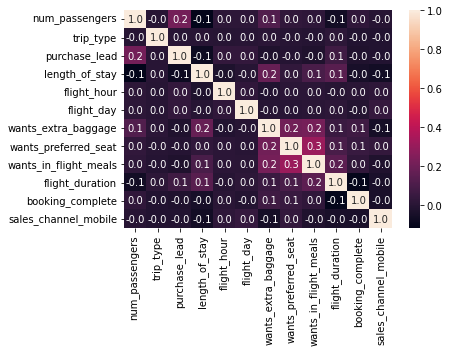

In [21]:
sns.heatmap(scaled_df1.corr(), annot = True,fmt=".1f" )

### Train test split

In [23]:
from sklearn.model_selection import train_test_split 

In [64]:
y = df['booking_complete']
df.drop(['route','booking_complete','booking_origin'], axis = 1, inplace = True) 

In [68]:
X_train , X_test, y_train, y_test = train_test_split(df.to_numpy(),y.to_numpy(), test_size = 0.2,random_state= 42 )

Model training

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score ,confusion_matrix, ConfusionMatrixDisplay


In [70]:
def model_fit_pred(model, X_train, y_train, X_test):
  model.fit(X_train, y_train)
  return model.predict(X_test)

def accuracy(y_test, y_pred):
  return accuracy_score(y_test, y_pred= y_pred)

def cm(y_test, y_pred):
  return (confusion_matrix(y_test, y_pred))

def precision(y_test, y_pred):
  return precision_score(y_test, y_pred= y_pred)

def recall(y_test, y_pred):
  return recall_score(y_test, y_pred= y_pred)

def f1(y_test, y_pred):
  return f1_score(y_test, y_pred= y_pred)

In [71]:
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [72]:
clf_rf.fit(X_train, y_train)
pred = clf_rf.predict(X_test)

print('accuracy', accuracy(y_test, pred))
print('precision', precision(y_test, pred))
print('recall', recall(y_test, pred))
print('f1', f1(y_test, pred))

accuracy 0.8486848684868487
precision 0.36764705882352944
recall 0.033852403520649964
f1 0.06199628022318661


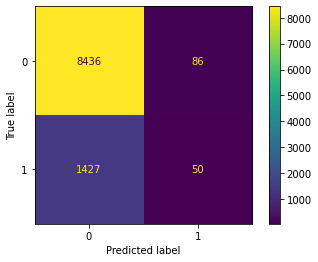

In [73]:
cmD = ConfusionMatrixDisplay(cm(y_test,pred))
cmD.plot()

Text(0.5, 0, 'Random Forest Feature Importance')

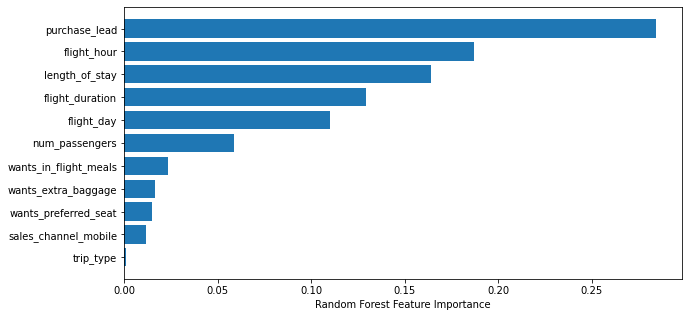

In [80]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [130]:
clsel = SelectFromModel(clf_rf)

In [132]:
clsel.fit_transform(indep, dep)
clsel.get_support()

array([False, False,  True,  True,  True,  True, False, False, False,
        True, False])

In [135]:
selected_clf = indep.columns[clsel.get_support()]

In [136]:
selected_clf

Index(['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day',
       'flight_duration'],
      dtype='object')

In [78]:
len(sorted_idx)

11

In [77]:
df.shape

(49992, 11)